# Работа с моделями нейросети и классификации

### Информация об используемом датасете

В исследовании были использованы семь различных сортов сухих бобов, с учетом таких особенностей, как форма, видоизменение и структура, в зависимости от ситуации на рынке. 

Была разработана система компьютерного зрения, позволяющая различать семь различных зарегистрированных сортов сухих бобов со схожими характеристиками для получения единой классификации семян. Для создания классификационной модели с помощью камеры высокого разрешения были получены изображения 13 611 зерен 7 различных зарегистрированных сухих бобов. 

Изображения зерен, полученные с помощью системы компьютерного зрения, были подвергнуты сегментации и выделению признаков, и из зерен было получено в общей сложности 16 признаков: 12 размеров и 4 формы.

## Загрузка необходимых библиотек

In [50]:
import pandas as pd
import numpy as np
# import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Загрузка датасета и общее ознакомление с данными

In [14]:
beans_data = pd.read_csv('Dry_Bean.csv')
beans_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


**Информация об атрибутах:**

    Area (A)              — Площадь боба (число пикселей внутри контура)
    Perimeter (P)         — Периметр (длина границы)
    MajorAxisLength (L)   — Длина большой оси эллипса
    MinorAxisLength (l)   — Длина малой оси эллипса
    AspectRatio (K)       — Соотношение осей (L / l)
    Eccentricity (Ec)     — Эксцентриситет (мера вытянутости: 0 — круг, →1 — эллипс)
    ConvexArea (C)        — Площадь выпуклой оболочки
    EquivalentDiameter (Ed)— Диаметр круга с той же площадью (√(4A/π))
    Extent (Ex)           — Заполнение bounding box (площадь боба / площадь рамки)
    Solidity (S)          — Выпуклость (площадь / площадь оболочки)
    Roundness (R)         — Округлость (4πA / P²)
    Compactness (CO)      — Компактность (эквивалентный диаметр / большая ось)
    ShapeFactor1–4 (SF1–4)— Производные морфологические признаки формы
    Class                 — Сорт боба: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira

In [16]:
print(f"Датасет имеет {beans_data.shape[1]} колонок.")
print(f"Датасет имеет {beans_data.shape[0]} строк.")

Датасет имеет 17 колонок.
Датасет имеет 13611 строк.


In [17]:
# Просмотр данных, пропущенных значений и типов данных
beans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

- **Особенности данных**: Датасет содержит 16 морфологических признаков зерен бобов (площадь, периметр, длины осей, соотношение осей, эксцентриситет, выпуклость, округлость и др.), демонстрирующих высокую дискриминативную способность для классификации сортов.

- **Полнота данных**: Отсутствие пропущенных значений (подтверждено столбцом 'Non-Null Count') исключает необходимость предварительной очистки данных.

- **Типы данных**: Все признаки, кроме целевой переменной 'Class' (категориальный тип), представлены в числовом формате (float64/int64), что оптимально для применения алгоритмов машинного обучения.

In [18]:
# просмотр сводной статистики датасета
beans_data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Статистический анализ признаков:

- **Размеры бобов**: Диапазон площади — 20,420 - 254,616 пикселей, что подтверждает широкий спектр размеров зерен.
- **Форма зерен**: Среднее соотношение осей 1.58 (мин. 1.02, макс. 2.43) — бобы в основном слабо вытянуты, однако присутствуют почти круглые и сильно удлиненные экземпляры. Средняя округлость 0.87 указывает на близость формы к идеальному кругу.

Данные свидетельствуют о том, что в наборе данных достаточно информации для определения характеристик различных сортов фасоли. Набор данных включает в себя информацию о широком диапазоне размеров, форм и плотности фасоли, что создаёт основу для дальнейшего изучения и кластерного анализа. 

In [19]:
# извлекаем уникальные значения классов
unique_values = beans_data['Class'].unique()

# подсчёт вхождений уникальных значений
unique_counts = beans_data['Class'].value_counts()

unique_counts

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

В данных содержится семь различных типов сортов фасоли, причем сорт DERMASON имеет наибольшее количество наблюдений (3546 записей), а сорт BOMBAY фасоль имеет наименьшее количество наблюдений (522 записи). Данные неравномерно распределены по классам. 

(можно заметить, что не нужно дополнительно очищать данные, так как в них нет пропущенных значений, а типы данных для признаков соответствуют нашим требованиям)

## Визуализация данных

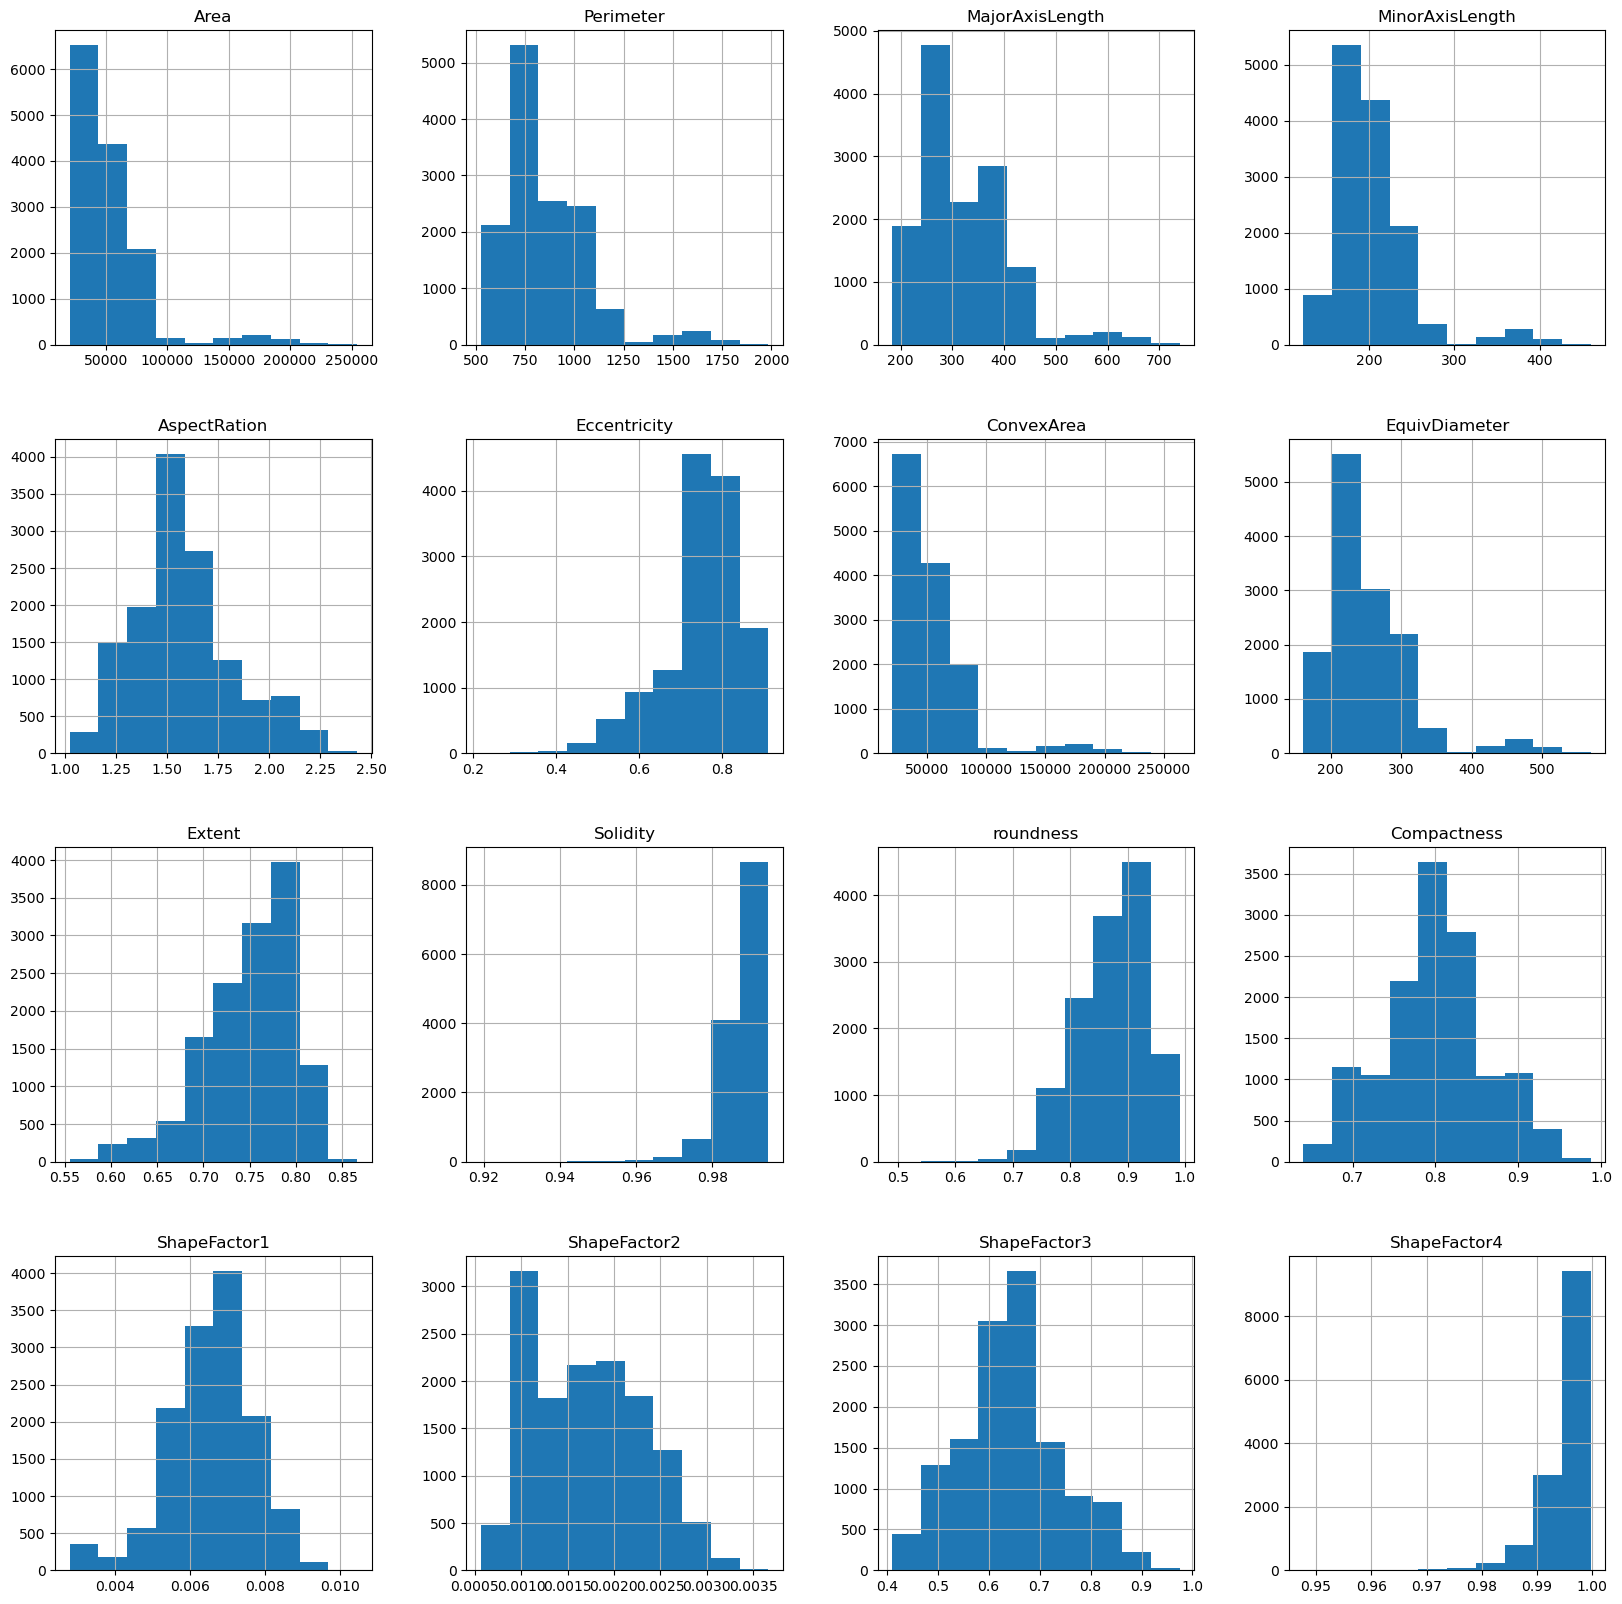

In [24]:
beans_data.hist(figsize=(20, 20));

Анализ распределений признаков:

- **Area, Perimeter, Major/MinorAxisLength, ConvexArea**:  
  Скошенные распределения влево означают доминирование мелких бобов, но также имеются и крупные бобы.
  
- **Roundness**:  
  - Roundness в среднем 0.87 -> форма близка к кругу, но не идеальна.

- **Solidity**:  
  - Solidity близка к 1 -> мало впадин в бобах, много выпуклости.  

- **ShapeFactors**:  
  - SF4 имеет резкий пик у значения 1.0 -> возможно, выделяется отдельная группу сортов.  

Распределения подтверждают высокую вариативность бобов, что хорошо влияет на успешную классификацию. Однако скошенность некоторых признаков требует нормализации (например, логарифмического) перед обучением моделей.

## Процентное распределение классов

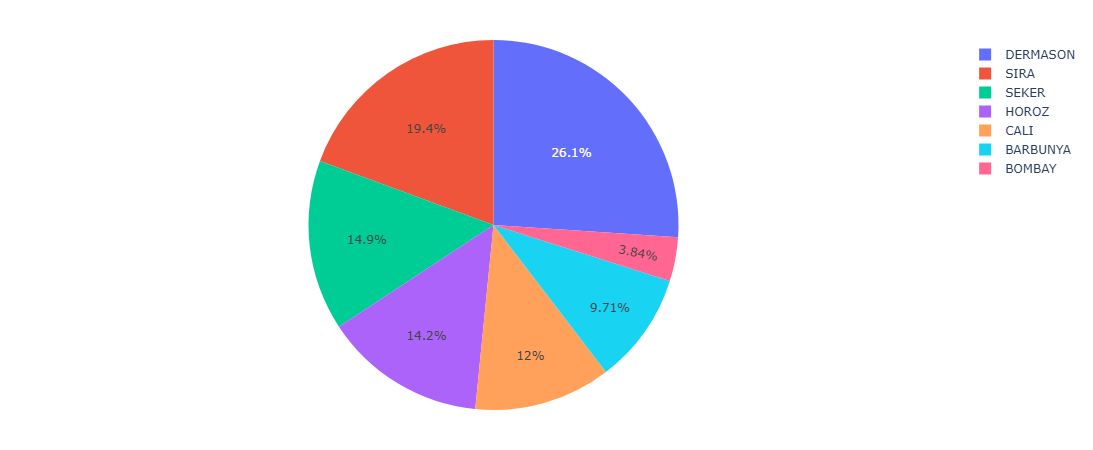

In [36]:
# высчитываем количество вхождений в каждый класс
class_counts = beans_data['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# конвертация в проценты
class_counts['Percentage'] = (class_counts['Count'] / class_counts['Count'].sum()) * 100

fig = px.pie(class_counts, names='Class', values='Percentage', height=450, width=1000)
fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="white",
)

fig.show()

Из приведённого выше графика видно, что чаще всего в данных встречаются бобы DERMASON, за ними следуют SIRA, SEKER и HOROZ. Бобы BOMBAY встречаются реже всего: из 13 000 записей их всего около 500.

### Соотношение площади с сторонами по классам

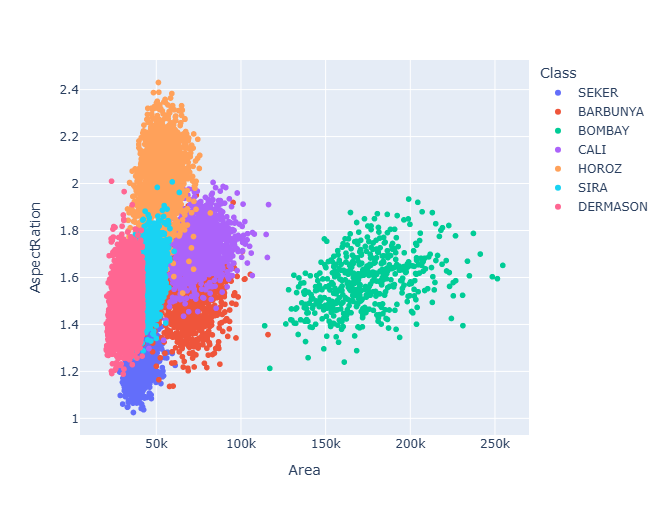

In [52]:
fig_scatter_area_aspect = px.scatter(beans_data, x='Area', y='AspectRation', color='Class')
fig_scatter_area_aspect.update_layout(width=1100, height=500)
fig_scatter_area_aspect.show()

    На графике зависимости площади от соотношения сторон видно, что на нём легко выделить фасоль сорта Bombay. 

    Остальные классы плотно расположены в другой области графика, поэтому использование только этих двух характеристик может не дать наилучших результатов.

### Зависимости (корреляции) признаков

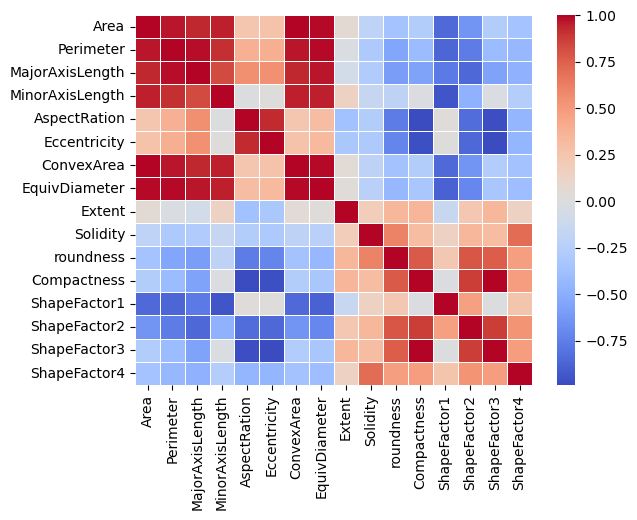

In [54]:
# матрица корреляции
data = beans_data.drop('Class', axis=1)
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

#### На тепловой карте заметно:
- Высокая корреляция между размерными характеристиками бобов (площадью, периметром, длиной осей (Axis lengths), выпуклой площадью (convex Area) и эквивалентным диаметром(EquivDiameter)). 
    
- Каждый признак является важным (площадь и длина большой и малой осей сильно коррелируют, но бобы имеют разную длину и ширину, несмотря на одинаковую площадь). 

Удаление каких-либо других характеристик приведёт к потере информации, именно поэтому не стоит что-либо удалять.

## Обучение модели классификации

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

In [61]:
# разделяем признаки и целевую переменную
X = beans_data.drop('Class', axis=1)
y = beans_data['Class']

In [62]:
# кодируем классы в числа (для нейросети)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [63]:
# Разделение с сохранением пропорций классов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

## Стандартизация/масштабирование/нормализация данных

     Исходя из наблюдений выше, можно сделать вывод о наличии избыточных признаков (с высокой степенью корреляции), но эти признаки важны для точной классификации данных о бобах, поэтому стоит стандартизировать их для обучения нейросети (для классификации и линейной модели не обязательно)

In [64]:
# стандартизация (для нейросети)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

## Обучение RandomForestClassifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, digits=4))

rf_f1 = rf_metrics['F1 (macro)']
print(f"Random Forest F1 (macro): {gb_f1:.4f}")

              precision    recall  f1-score   support

    BARBUNYA     0.9405    0.8943    0.9168       265
      BOMBAY     1.0000    1.0000    1.0000       104
        CALI     0.9358    0.9387    0.9372       326
    DERMASON     0.9044    0.9210    0.9126       709
       HOROZ     0.9657    0.9482    0.9569       386
       SEKER     0.9373    0.9581    0.9476       406
        SIRA     0.8607    0.8558    0.8582       527

    accuracy                         0.9203      2723
   macro avg     0.9349    0.9309    0.9328      2723
weighted avg     0.9205    0.9203    0.9203      2723

Random Forest F1 (macro): 0.9318


## Обучение GradientBoostingClassifier

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print(classification_report(y_test, y_pred_gb, digits=4))

gb_f1 = gb_metrics['F1 (macro)']
print(f"Gradient Boosting F1 (macro): {gb_f1:.4f}")

              precision    recall  f1-score   support

    BARBUNYA     0.9474    0.8830    0.9141       265
      BOMBAY     1.0000    1.0000    1.0000       104
        CALI     0.9410    0.9294    0.9352       326
    DERMASON     0.9096    0.9224    0.9160       709
       HOROZ     0.9436    0.9534    0.9485       386
       SEKER     0.9420    0.9606    0.9512       406
        SIRA     0.8577    0.8577    0.8577       527

    accuracy                         0.9199      2723
   macro avg     0.9345    0.9295    0.9318      2723
weighted avg     0.9201    0.9199    0.9199      2723

Gradient Boosting F1 (macro): 0.9318


## Обучение модели нейронной сети

In [87]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [135]:
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # 16 признаков
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(7, activation='softmax')  # 7 сортов
])

In [136]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])        

In [137]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [138]:
print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,783 (14.78 KB)

 Trainable params: 3,591 (14.03 KB)

 Non-trainable params: 192 (768.00 B)

None


In [139]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train_enc),
    y=y_train_enc
)
class_weights = dict(enumerate(class_weights))

history = model.fit(
    X_train_scaled, y_train_enc,
    class_weight=class_weights,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6235 - loss: 1.0910 - val_accuracy: 0.8921 - val_loss: 0.3932
Epoch 2/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8179 - loss: 0.5086 - val_accuracy: 0.9128 - val_loss: 0.2572
Epoch 3/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8512 - loss: 0.4231 - val_accuracy: 0.9238 - val_loss: 0.2302
Epoch 4/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8660 - loss: 0.3736 - val_accuracy: 0.9086 - val_loss: 0.2311
Epoch 5/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8749 - loss: 0.3456 - val_accuracy: 0.9224 - val_loss: 0.2118
Epoch 6/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8789 - loss: 0.3231 - val_accuracy: 0.9279 - val_loss: 0.2015
Epoch 7/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8874 - loss: 0.2998 - val_accuracy: 0.9298 - val_loss: 0.1984
Epoch 8/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8898 - loss: 0.3058 - val_accu

In [140]:
y_pred_nn = model.predict(X_test_scaled)
y_pred_nn = np.argmax(y_pred_nn, axis=1)  # конвертируем вероятности в классы

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [153]:
print(classification_report(
    y_test,  
    le.inverse_transform(y_pred_nn),  # конвертируем числа в названия сортов
    digits=4
))

nn_f1 = nn_metrics['F1 (macro)']
print(f"Neural Network F1 (macro): {nn_f1:.4f}")

              precision    recall  f1-score   support

    BARBUNYA     0.9377    0.9094    0.9234       265
      BOMBAY     1.0000    1.0000    1.0000       104
        CALI     0.9331    0.9417    0.9374       326
    DERMASON     0.9312    0.9168    0.9240       709
       HOROZ     0.9634    0.9560    0.9597       386
       SEKER     0.9373    0.9581    0.9476       406
        SIRA     0.8715    0.8880    0.8797       527

    accuracy                         0.9284      2723
   macro avg     0.9392    0.9386    0.9388      2723
weighted avg     0.9286    0.9284    0.9284      2723

Neural Network F1 (macro): 0.9388


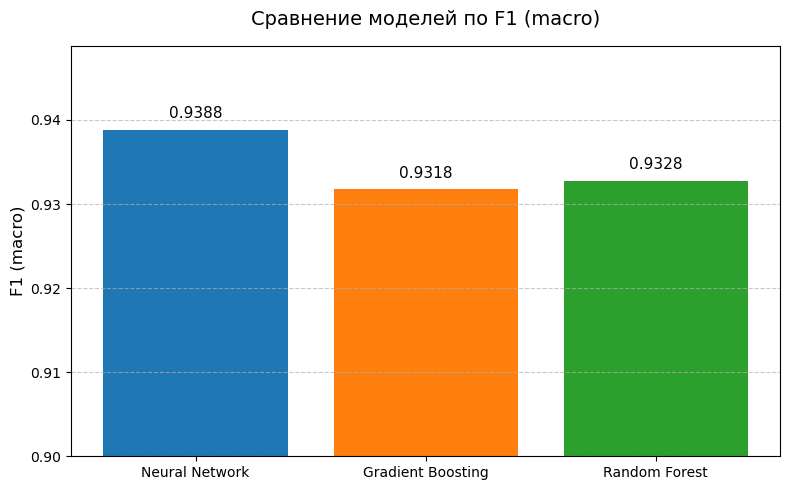

In [154]:
import matplotlib.pyplot as plt

models = ['Neural Network', 'Gradient Boosting', 'Random Forest']
f1_scores = [nn_f1, gb_f1, rf_f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, f1_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{score:.4f}', ha='center', va='bottom', fontsize=11)

plt.title('Сравнение моделей по F1 (macro)', fontsize=14, pad=15)
plt.ylabel('F1 (macro)', fontsize=12)
plt.ylim(0.90, max(f1_scores) + 0.01)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Итоговый вывод
### Все модели показали высокое качество - F1 (macro) > 0.93
### Нейронная сеть превосходит Random Forest по F1 (0.9388 vs 0.9328)
### Нейросеть лучше, так как она лучше обрабатывает сложные комбинации признаков (соотношение площади и округлости).
### Random Forest и Gradient Boosting почти сравнялись с нейросетью, что вполне нормально для табличных данных.